## Imports

In [23]:
import numpy as np
import pandas as pd
import math
from scipy.spatial.distance import cdist 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv", na_values=['Unknown'])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
data.drop(['id'], axis = 1, inplace = True)
data.shape

(5110, 11)

In [26]:
# making a function to get the columns with missing values only
def get_missing():
    num_missing = data.isnull().sum()
    print(num_missing[num_missing > 0])

get_missing()

bmi                201
smoking_status    1544
dtype: int64


In [27]:
mean_value = data['bmi'].mean()
data['bmi'].fillna(value= mean_value, inplace= True)
mode_value = data['smoking_status'].mode()[0]
data['smoking_status'].fillna(value = mode_value, inplace= True)
get_missing()

Series([], dtype: int64)


In [28]:
for name in list(data):
    if data[name].dtype == 'object':
        print(f"{name}: {data[name].unique()}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes']


In [15]:
lis =['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data = pd.get_dummies(data=data, columns=lis)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [8]:
lis = ['age', 'avg_glucose_level', 'bmi']
for name in lis:
    min = data[name].min()
    max = data[name].max()
    data[name] = (data[name] - min) / (max - min)
    
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,0.801265,0.301260,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,0.743652,0,0,0.679023,0.212981,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0.975586,0,1,0.234512,0.254296,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0.597168,0,0,0.536008,0.276060,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0.963379,1,0,0.549349,0.156930,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

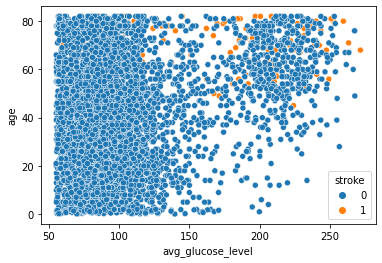

In [49]:
sns.scatterplot(data=data, x="avg_glucose_level", y="age", hue = 'stroke')

In [41]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [50]:
data['y'] = data['stroke']
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,y
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1
